### Libraries

In [355]:
import pandas as pd

### Data load

In [356]:
pd.set_option('display.max_columns', None)

In [357]:
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true'
df = pd.read_csv(url,index_col=0)
df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-01-19,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### How many rows does the df have?

In [358]:
len(df)

276697

### How many rows and columns does the df have?

In [359]:
df.shape

(276697, 66)

### Data types

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276697 entries, AFG to ZWE
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   262723 non-null  object 
 1   location                                    276697 non-null  object 
 2   date                                        276697 non-null  object 
 3   total_cases                                 47775 non-null   float64
 4   new_cases                                   51838 non-null   float64
 5   new_cases_smoothed                          50608 non-null   float64
 6   total_deaths                                44649 non-null   float64
 7   new_deaths                                  51859 non-null   float64
 8   new_deaths_smoothed                         50629 non-null   float64
 9   total_cases_per_million                     47775 non-null   float64
 10  ne

### General vision

In [361]:
df[['location', 'total_cases']].dropna().groupby('location')['total_cases'].mean().reset_index()

,location,total_cases
0,Afghanistan,1.406842e+05
1,Africa,8.381700e+06
2,Albania,2.058543e+05
3,Algeria,1.884865e+05
4,American Samoa,6.144443e+03
...,...,...
239,Wallis and Futuna,1.603254e+03
240,World,3.811820e+08
241,Yemen,8.426482e+03
242,Zambia,2.176938e+05


In [362]:
total_cases_by_location = df[['location', 'total_cases', 'date']].dropna()
total_cases_by_location[total_cases_by_location['location'] == 'Afghanistan']

,location,total_cases,date
iso_code,,,
AFG,Afghanistan,1.0,2020-03-01
AFG,Afghanistan,1.0,2020-03-08
AFG,Afghanistan,7.0,2020-03-15
AFG,Afghanistan,24.0,2020-03-22
AFG,Afghanistan,91.0,2020-03-29
...,...,...,...
AFG,Afghanistan,229703.0,2023-12-17
AFG,Afghanistan,230075.0,2023-12-24
AFG,Afghanistan,230375.0,2023-12-31


In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

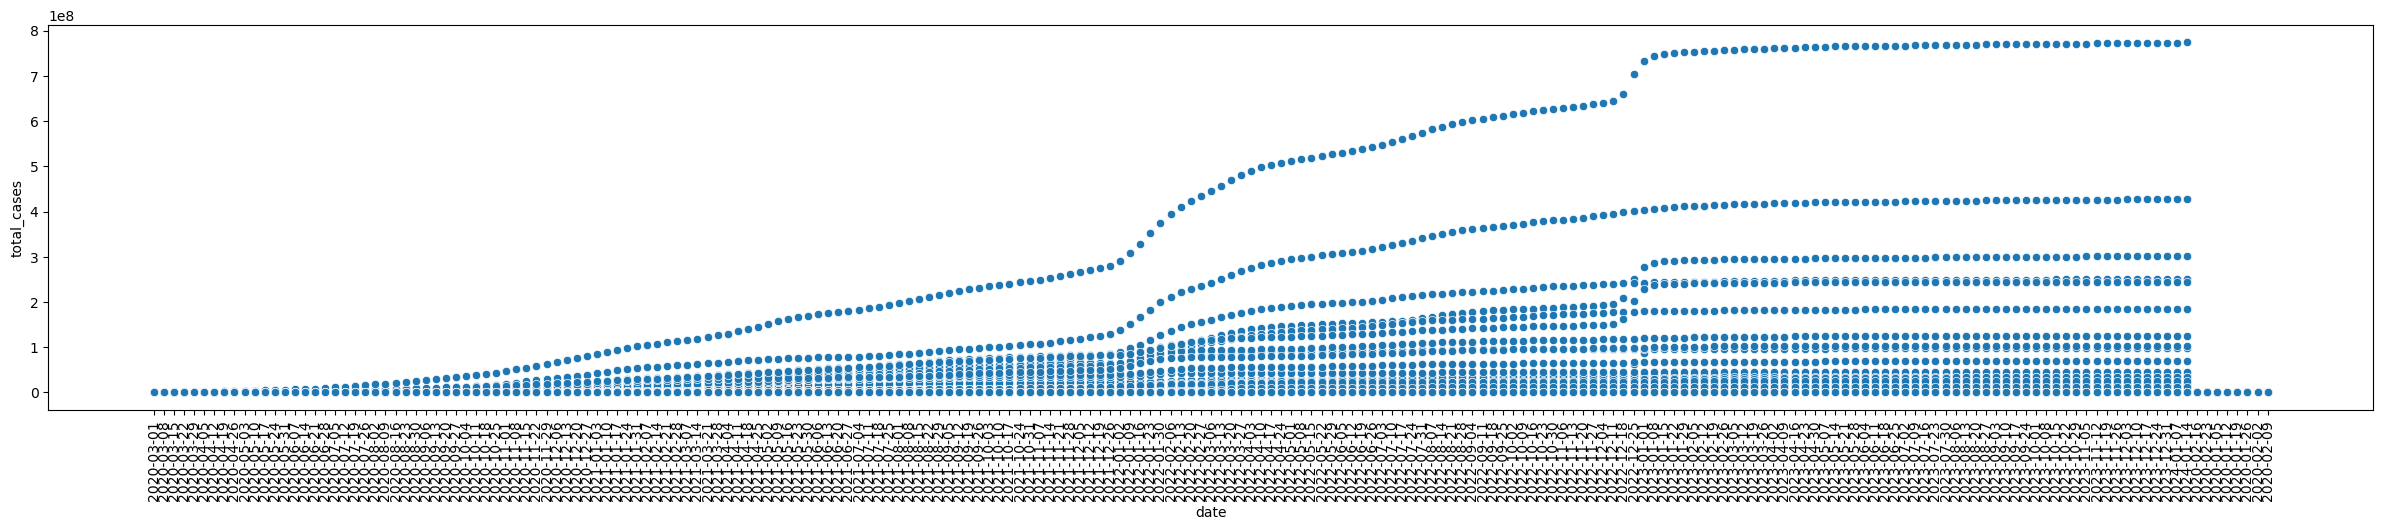

In [364]:
fig = plt.figure(figsize=(30,5))
sns.scatterplot(x='date', y='total_cases', data=total_cases_by_location)
plt.xticks(rotation=90)
plt.show()

In [365]:
total_cases_by_location[total_cases_by_location['date'].duplicated()]

,location,total_cases,date
iso_code,,,
OWID_AFR,Africa,3.0,2020-03-01
OWID_AFR,Africa,80.0,2020-03-08
OWID_AFR,Africa,314.0,2020-03-15
OWID_AFR,Africa,1337.0,2020-03-22
OWID_AFR,Africa,4566.0,2020-03-29
...,...,...,...
ZWE,Zimbabwe,266025.0,2023-12-17
ZWE,Zimbabwe,266048.0,2023-12-24
ZWE,Zimbabwe,265929.0,2023-12-31


In [366]:
total_cases_by_location[total_cases_by_location['date'] == '2020-03-01']

,location,total_cases,date
iso_code,,,
AFG,Afghanistan,1.0,2020-03-01
OWID_AFR,Africa,3.0,2020-03-01
DZA,Algeria,1.0,2020-03-01
OWID_ASI,Asia,84691.0,2020-03-01
AUS,Australia,25.0,2020-03-01
...,...,...,...
GBR,United Kingdom,68.0,2020-03-01
USA,United States,73.0,2020-03-01
OWID_UMC,Upper middle income,80069.0,2020-03-01


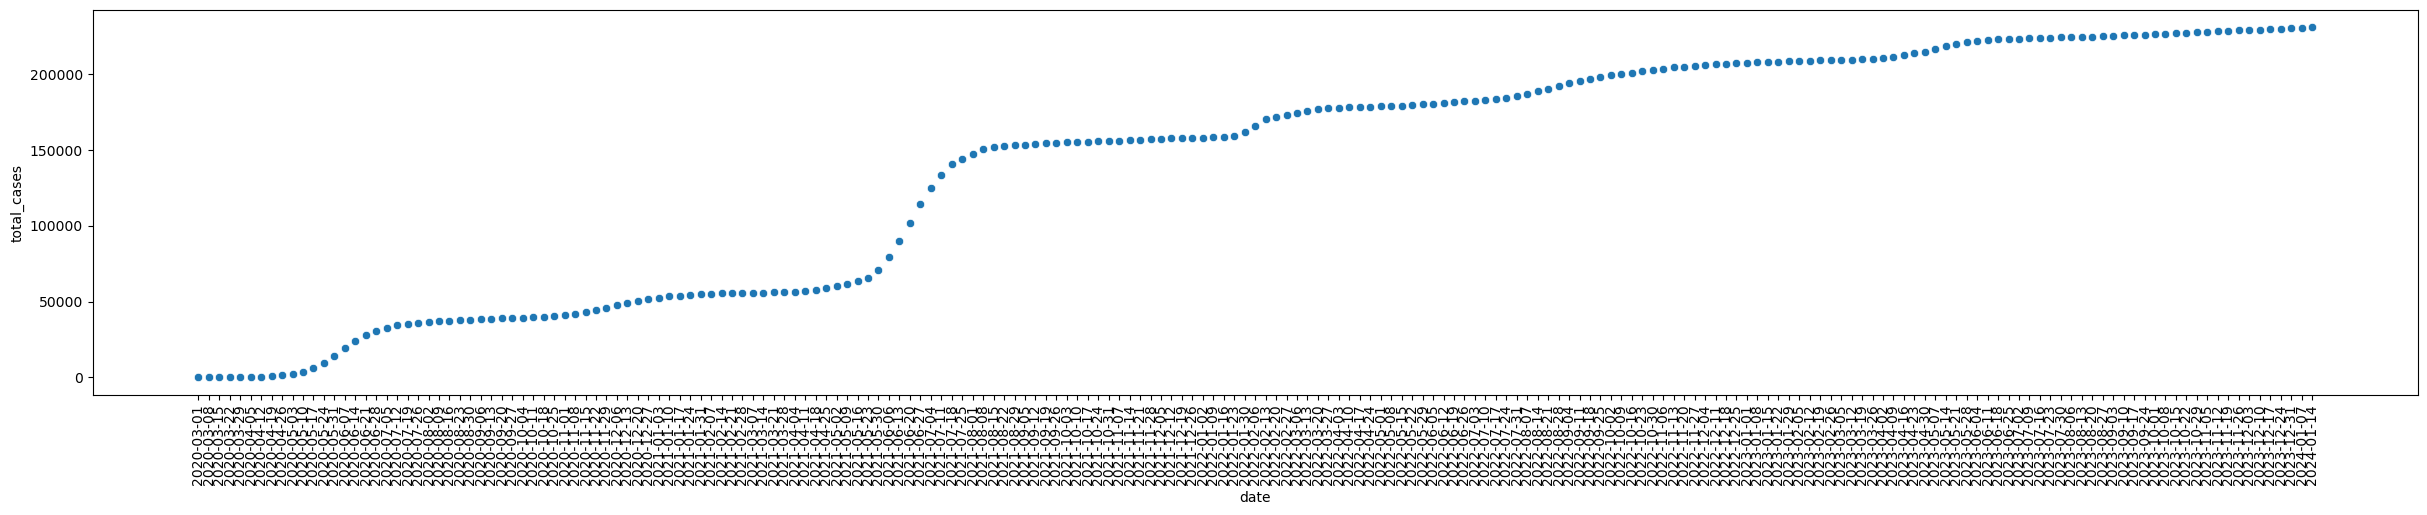

In [367]:
plot_Afghanistan = total_cases_by_location[total_cases_by_location['location'] == 'Afghanistan']
fig = plt.figure(figsize=(30,5))
sns.scatterplot(x='date', y='total_cases', data=plot_Afghanistan)
plt.xticks(rotation=90)
plt.show()

### Missing values proportion

In [368]:
def miss_values():
    missing_values = df.isnull().sum().to_frame().reset_index()
    missing_values = missing_values.rename(columns={'index': 'Feature', 0: 'Empty Cells'})
    missing_values['Percentage %'] = (missing_values['Empty Cells']/df.shape[0])*100
    missing_values = missing_values.sort_values(by='Empty Cells', ascending=False)
    return missing_values

In [369]:
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
21,weekly_icu_admissions_per_million,266245,96.222583
20,weekly_icu_admissions,266245,96.222583
65,excess_mortality_cumulative_per_million,264814,95.705411
63,excess_mortality_cumulative,264814,95.705411
64,excess_mortality,264814,95.705411
...,...,...,...
59,life_expectancy,21953,7.933949
0,continent,13974,5.050290
61,population,0,0.000000
2,date,0,0.000000


### Delete missing values of total_cases (target)

In [370]:
df = df.dropna(subset=['total_cases'])

In [371]:
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
21,weekly_icu_admissions_per_million,44936,94.057561
20,weekly_icu_admissions,44936,94.057561
23,weekly_hosp_admissions_per_million,43450,90.947148
22,weekly_hosp_admissions,43450,90.947148
19,hosp_patients_per_million,42687,89.350078
...,...,...,...
3,total_cases,0,0.000000
2,date,0,0.000000
9,total_cases_per_million,0,0.000000
61,population,0,0.000000


In [372]:
missing_values = missing_values[missing_values['Percentage %'] < 20]
missing_values

,Feature,Empty Cells,Percentage %
53,cardiovasc_death_rate,9401,19.677656
50,aged_70_older,9284,19.432758
48,median_age,8881,18.589220
54,diabetes_prevalence,7597,15.901622
47,population_density,6068,12.701204
59,life_expectancy,3174,6.643642
6,total_deaths,3129,6.549451
12,total_deaths_per_million,3129,6.549451
0,continent,2501,5.234956
11,new_cases_smoothed_per_million,155,0.324437


In [373]:
feature_selected = missing_values['Feature'].to_list()
feature_selected

['cardiovasc_death_rate',
 'aged_70_older',
 'median_age',
 'diabetes_prevalence',
 'population_density',
 'life_expectancy',
 'total_deaths',
 'total_deaths_per_million',
 'continent',
 'new_cases_smoothed_per_million',
 'new_cases_smoothed',
 'new_deaths_smoothed',
 'new_deaths_smoothed_per_million',
 'new_cases_per_million',
 'new_cases',
 'new_deaths_per_million',
 'new_deaths',
 'total_cases',
 'date',
 'total_cases_per_million',
 'population',
 'location']

### Reducing dataframe only to a data with missing values less than 20%

In [374]:
df = df[feature_selected]

In [375]:
df.describe()

,cardiovasc_death_rate,aged_70_older,median_age,diabetes_prevalence,population_density,life_expectancy,total_deaths,total_deaths_per_million,new_cases_smoothed_per_million,new_cases_smoothed,new_deaths_smoothed,new_deaths_smoothed_per_million,new_cases_per_million,new_cases,new_deaths_per_million,new_deaths,total_cases,total_cases_per_million,population
count,38374.000000,38491.000000,38894.000000,40178.00000,41707.000000,44601.000000,4.464600e+04,44646.000000,47620.000000,4.762000e+04,47641.000000,47641.000000,47707.000000,4.770700e+04,47728.000000,47728.000000,4.777500e+04,47775.000000,4.777500e+04
mean,260.465520,5.535505,30.496274,8.39867,328.669963,73.717601,8.851629e+04,901.534563,1043.779365,6.883946e+04,612.220990,6.511640,1044.098061,6.877466e+04,6.506437,611.473998,7.134356e+06,108530.652171,1.409074e+08
std,118.211688,4.187662,9.095874,4.71316,1499.754347,7.422708,4.506115e+05,1120.553418,3134.474632,5.496717e+05,3869.141217,15.810078,4225.644913,6.701253e+05,19.595727,3959.004020,4.283082e+07,156968.771033,6.948750e+08
min,79.370000,0.526000,15.100000,0.99000,0.137000,53.280000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,4.700000e+01
25%,171.285000,2.063000,22.000000,5.31000,37.728000,69.590000,1.320000e+02,64.185000,4.633000,1.457100e+01,0.000000,0.000000,1.333000,7.000000e+00,0.000000,0.000000,8.989500e+03,2791.082500,6.180460e+05
50%,243.964000,3.871000,29.900000,7.20000,87.324000,75.120000,1.364000e+03,393.907500,83.760500,2.832860e+02,2.000000,0.530000,57.696000,2.240000e+02,0.134500,1.000000,7.519400e+04,31525.510000,6.780745e+06
75%,329.942000,8.678000,38.700000,10.68000,214.243000,79.380000,1.215675e+04,1431.433500,719.340750,4.304143e+03,44.000000,5.442000,611.069500,3.877500e+03,4.290000,40.000000,8.272305e+05,149733.453500,3.347587e+07
max,724.417000,18.493000,48.200000,30.53000,19347.500000,86.750000,7.013140e+06,6507.656000,71483.706000,1.899102e+07,93583.286000,354.115000,240325.866000,4.423623e+07,906.413000,103719.000000,7.741444e+08,754047.866000,7.975105e+09


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47775 entries, AFG to ZWE
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cardiovasc_death_rate            38374 non-null  float64
 1   aged_70_older                    38491 non-null  float64
 2   median_age                       38894 non-null  float64
 3   diabetes_prevalence              40178 non-null  float64
 4   population_density               41707 non-null  float64
 5   life_expectancy                  44601 non-null  float64
 6   total_deaths                     44646 non-null  float64
 7   total_deaths_per_million         44646 non-null  float64
 8   continent                        45274 non-null  object 
 9   new_cases_smoothed_per_million   47620 non-null  float64
 10  new_cases_smoothed               47620 non-null  float64
 11  new_deaths_smoothed              47641 non-null  float64
 12  new_deaths_smoothed_per

In [377]:
amount_rows_before_manipulating_nulls = df.shape[0]

In [378]:
df['date'] = pd.to_datetime(df['date'])

In [379]:
df.dtypes

cardiovasc_death_rate                     float64
aged_70_older                             float64
median_age                                float64
diabetes_prevalence                       float64
population_density                        float64
life_expectancy                           float64
total_deaths                              float64
total_deaths_per_million                  float64
continent                                  object
new_cases_smoothed_per_million            float64
new_cases_smoothed                        float64
new_deaths_smoothed                       float64
new_deaths_smoothed_per_million           float64
new_cases_per_million                     float64
new_cases                                 float64
new_deaths_per_million                    float64
new_deaths                                float64
total_cases                               float64
date                               datetime64[ns]
total_cases_per_million                   float64


## EDA (Exploratory Data Analysis) categorical variables

In [380]:
from math import ceil

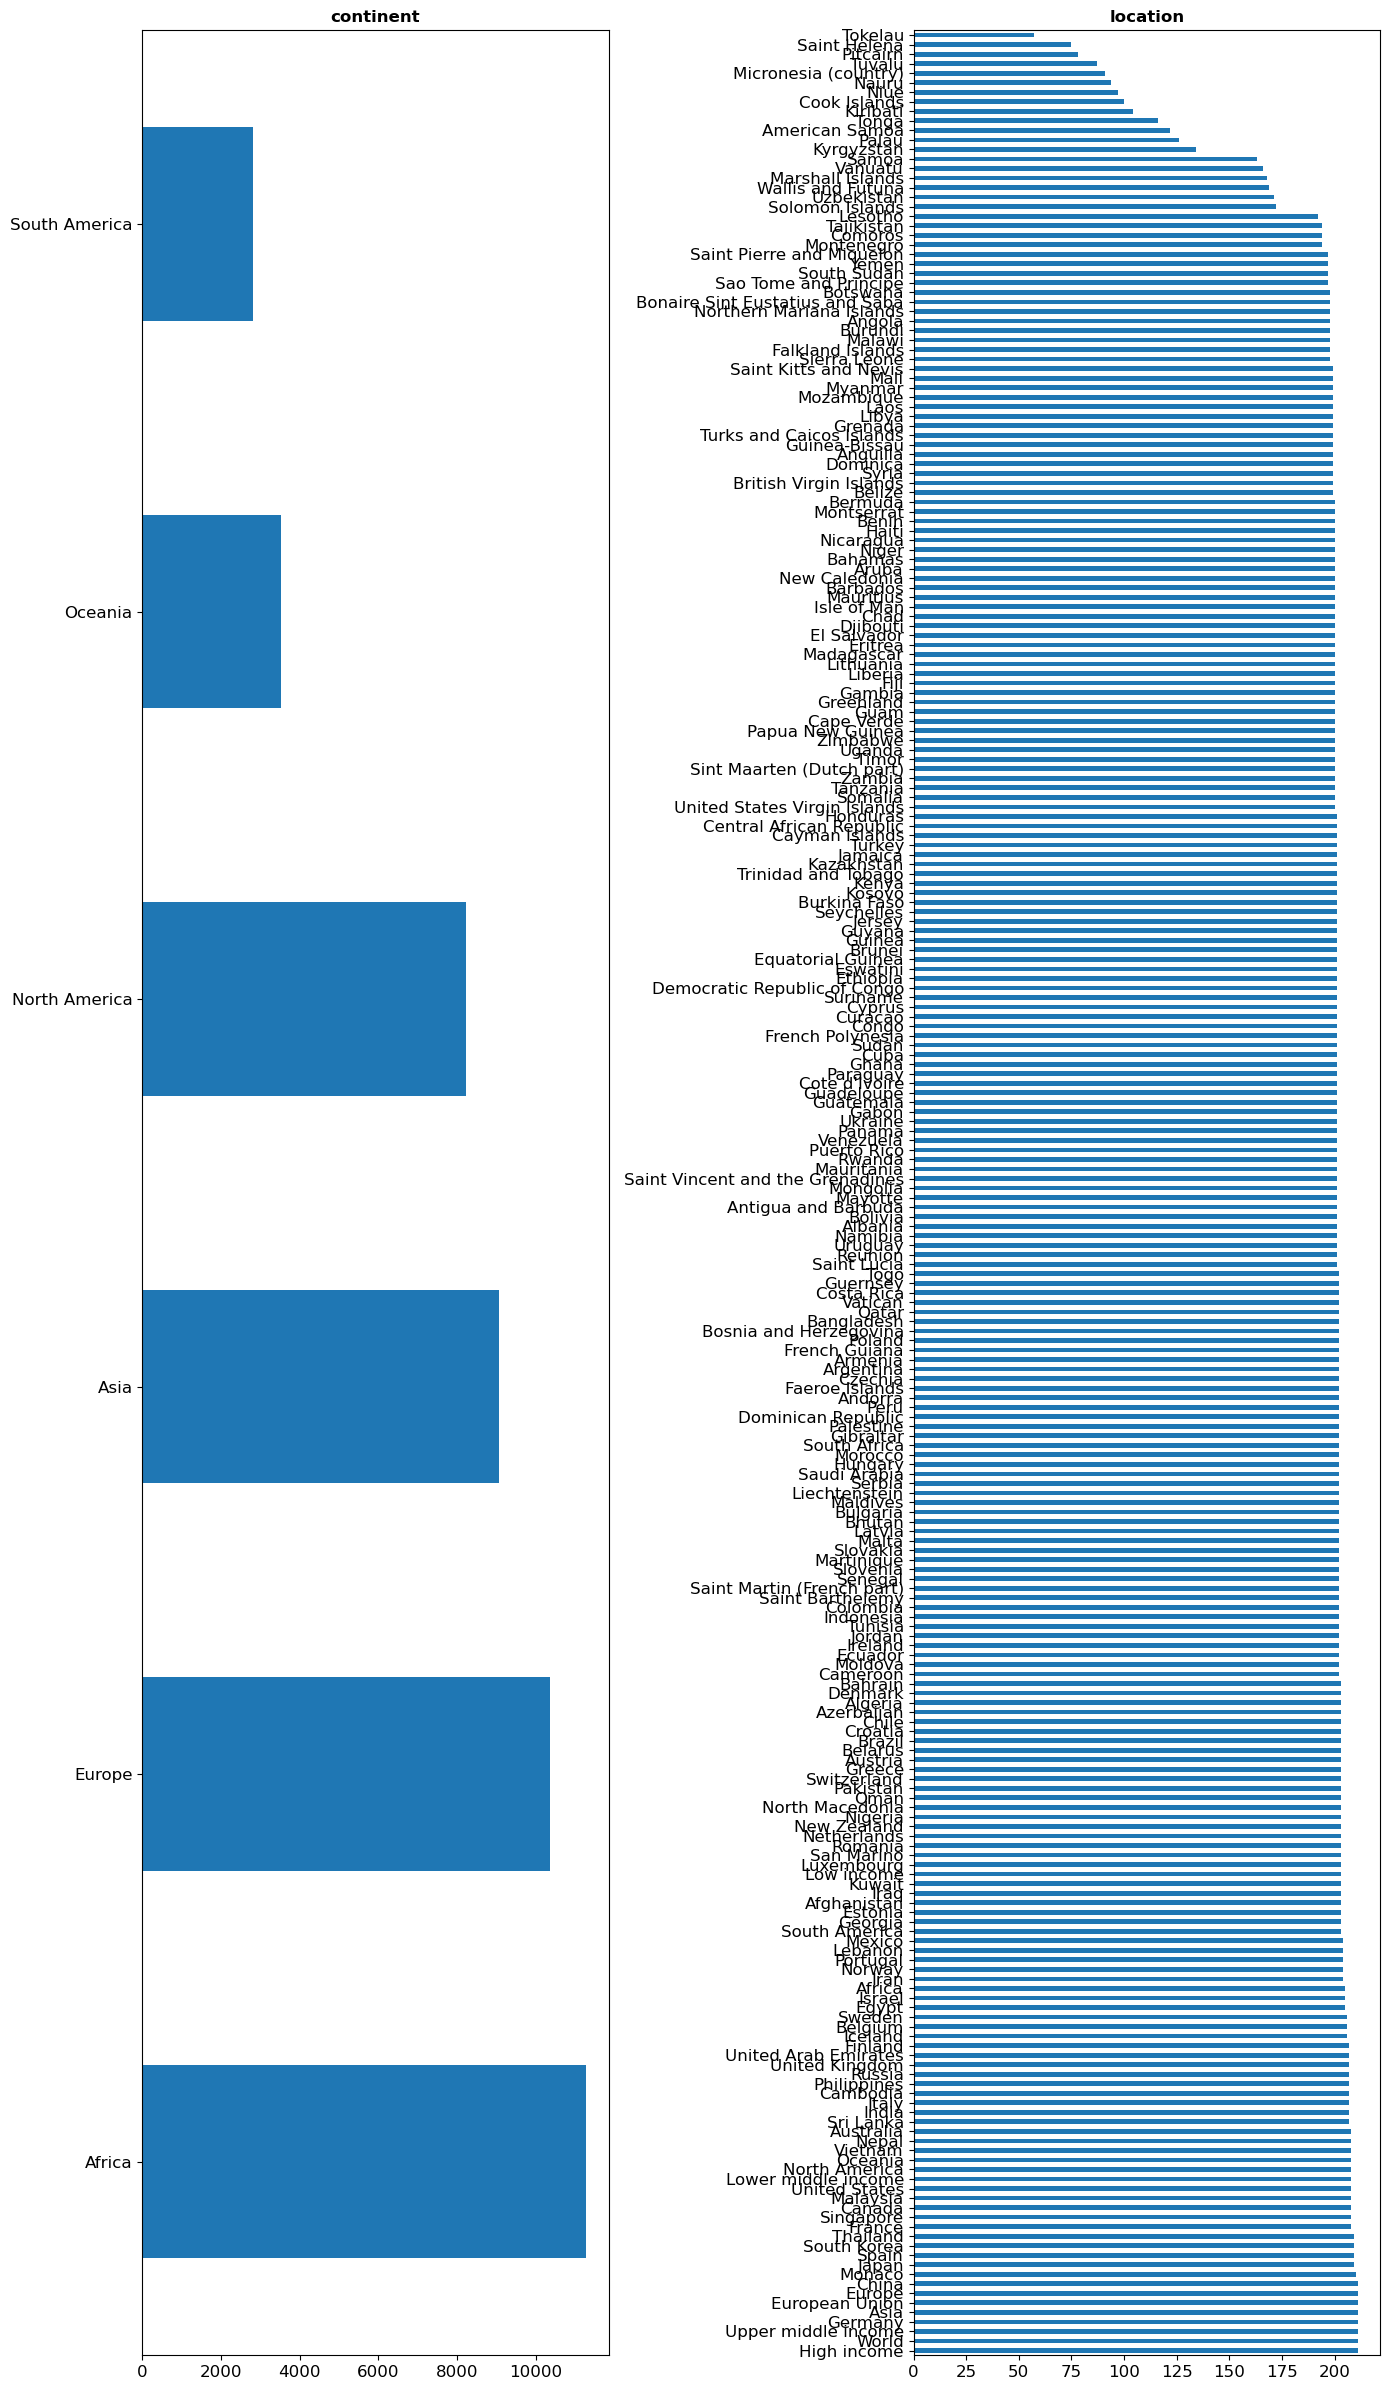

In [381]:
def EDA_categorical_graphics(cat):
    rows = ceil(cat.shape[1] / 2)
    f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(14, rows*24))

    ax = ax.flat
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[each])
        ax[each].set_title(variable, fontsize=12, fontweight='bold')
        ax[each].tick_params(labelsize=12)
        plt.tight_layout()

EDA_categorical_graphics(df.select_dtypes('O'))

Conclusions:
<ul>
    <li> Deleting from location some 'countries' that they aren't countries, like 'Africa', 'Asia', 'Low income' .... </li>
</ul>

### Deleting continents in location

In [382]:
things_rare_in_location = ['Africa', 'Asia', 'Oceania', 'Europe', 'South America', 'North America', 'European Union', 'World', 
                          'High income', 'Upper middle income', 'Low income', 'Lower middle income','American Samoa', 'Wallis and Futuna']

In [383]:
df.drop(df[df['location'].isin(things_rare_in_location)].index.tolist(), inplace=True)

## EDA (Exploratory Data Analysis) numerical variables

In [384]:
def statistics_count(num):
    statistics = num.describe().T
    statistics['median'] = num.median()
    statistics = statistics.iloc[:, [0,1,8,2,3,4,5,6,7]]
    return(statistics)
statistics_count(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
cardiovasc_death_rate,38041.0,2.605428e+02,243.964,1.187031e+02,79.370,170.050,243.964,3.299420e+02,7.244170e+02
aged_70_older,38280.0,5.536500e+00,3.871,4.199166e+00,0.526,2.063,3.871,8.800250e+00,1.849300e+01
median_age,38683.0,3.049407e+01,29.700,9.120599e+00,15.100,22.000,29.700,3.870000e+01,4.820000e+01
diabetes_prevalence,39967.0,8.398082e+00,7.200,4.725578e+00,0.990,5.310,7.200,1.068000e+01,3.053000e+01
population_density,41374.0,3.301989e+02,88.125,1.505651e+03,0.137,37.312,88.125,2.142430e+02,1.934750e+04
life_expectancy,44099.0,7.369914e+01,75.120,7.454454e+00,53.280,69.590,75.120,7.938000e+01,8.675000e+01
total_deaths,41932.0,2.256035e+04,1041.000,8.503805e+04,1.000,125.000,1041.000,9.037250e+03,1.161235e+06
total_deaths_per_million,41932.0,9.005930e+02,391.681,1.129849e+03,0.001,61.783,391.681,1.427258e+03,6.507656e+03
new_cases_smoothed_per_million,44864.0,1.050520e+03,77.696,3.173190e+03,0.000,4.136,77.696,7.126505e+02,7.148371e+04
new_cases_smoothed,44864.0,1.723693e+04,224.143,1.703675e+05,0.000,12.571,224.143,3.034714e+03,1.264505e+07


Conclusions:
<ul>
    <li> Impute 'median age' with the median of the median age of each continent </li>
    <li> Impute variables with the main of the continents: 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'population_density', 'total_deaths', 'total_deaths_per_million','life_expectancy','new_cases_smoothed_per_million', 'new_cases_smoothed' </li>
    <li> Delete missing values of 'new_deaths_smoothed' and 'new_cases', this is beacause these variables have few missing values. </li>
</ul>

### Impute 'median_age' variable by the median of this variable in each 'continent'

In [385]:
df.groupby('continent')['median_age'].agg([min, max])

,min,max
continent,,
Africa,15.1,37.4
Asia,18.0,48.2
Europe,37.3,47.9
North America,22.9,45.7
Oceania,20.8,37.9
South America,25.3,35.6


In [386]:
dic = df.groupby('continent')['median_age'].median().to_dict()
dic

{'Africa': 19.4,
 'Asia': 30.6,
 'Europe': 42.4,
 'North America': 33.6,
 'Oceania': 28.6,
 'South America': 29.1}

In [387]:
df['median_age'] = df.apply(lambda row: dic.get(row['continent'], 
                            row['median_age']) if pd.isna(row['median_age']) else row['median_age'], axis=1)
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
0,cardiovasc_death_rate,6942,15.432497
1,aged_70_older,6703,14.901185
3,diabetes_prevalence,5016,11.150879
4,population_density,3609,8.023031
6,total_deaths,3051,6.782562
7,total_deaths_per_million,3051,6.782562
5,life_expectancy,884,1.965187
10,new_cases_smoothed,119,0.264544
9,new_cases_smoothed_per_million,119,0.264544
12,new_deaths_smoothed_per_million,98,0.217860


### Impute 'aged_70_older' variable by the mean of this variable in each 'continent'

In [388]:
df[df['aged_70_older'] > 11]['continent'].value_counts()

Europe           5102
Asia              209
North America     202
Name: continent, dtype: int64

In [389]:
dic = df.groupby('continent')['aged_70_older'].mean().to_dict()
for key, value in dic.items():
    dic[key] = round(value, 3)
dic

{'Africa': 2.272,
 'Asia': 3.879,
 'Europe': 11.785,
 'North America': 6.483,
 'Oceania': 4.841,
 'South America': 5.011}

In [390]:
def impute(df, dicc, vble_to_change, vble_conditional='continent',):
    df[vble_to_change] = df.apply(lambda row: dicc.get(row[vble_conditional], 
                            row[vble_to_change]) if pd.isna(row[vble_to_change]) else row[vble_to_change], axis=1)

In [391]:
impute(df, dic, 'aged_70_older')
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
0,cardiovasc_death_rate,6942,15.432497
3,diabetes_prevalence,5016,11.150879
4,population_density,3609,8.023031
6,total_deaths,3051,6.782562
7,total_deaths_per_million,3051,6.782562
5,life_expectancy,884,1.965187
9,new_cases_smoothed_per_million,119,0.264544
10,new_cases_smoothed,119,0.264544
12,new_deaths_smoothed_per_million,98,0.217860
11,new_deaths_smoothed,98,0.217860


### Impute 'cardiovasc_death_rate' variable by the mean of this variable in each 'continent'

In [392]:
df.groupby('continent')['cardiovasc_death_rate'].agg([min, max])

,min,max
continent,,
Africa,181.013,525.432
Asia,79.370,724.417
Europe,86.060,539.849
North America,105.599,430.548
Oceania,107.791,561.494
South America,85.755,373.159


In [393]:
dic = df.groupby('continent')['cardiovasc_death_rate'].mean().to_dict()
for key, value in dic.items():
    dic[key] = round(value, 3)
dic

{'Africa': 287.3,
 'Asia': 290.863,
 'Europe': 229.371,
 'North America': 196.804,
 'Oceania': 355.156,
 'South America': 187.181}

In [394]:
impute(df, dic, 'cardiovasc_death_rate')
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
3,diabetes_prevalence,5016,11.150879
4,population_density,3609,8.023031
6,total_deaths,3051,6.782562
7,total_deaths_per_million,3051,6.782562
5,life_expectancy,884,1.965187
9,new_cases_smoothed_per_million,119,0.264544
10,new_cases_smoothed,119,0.264544
11,new_deaths_smoothed,98,0.217860
12,new_deaths_smoothed_per_million,98,0.217860
14,new_cases,68,0.151168


### Impute 'diabetes_prevalence' variable by the mean of this variable in each 'continent'

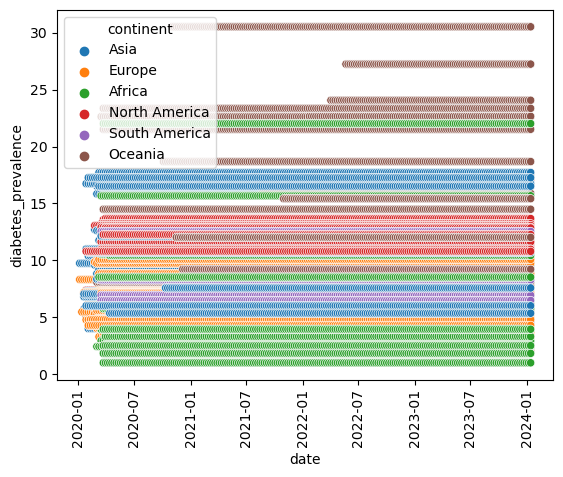

In [395]:
sns.scatterplot(x='date', y='diabetes_prevalence', hue='continent', data=df)
plt.xticks(rotation=90)
plt.show()

In [396]:
diabetes = df.groupby('continent')['diabetes_prevalence'].mean().reset_index()
median_asia_diabetes = diabetes[diabetes['continent'] == 'Asia']['diabetes_prevalence']
median_asia_diabetes

1    9.382375
Name: diabetes_prevalence, dtype: float64

d:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



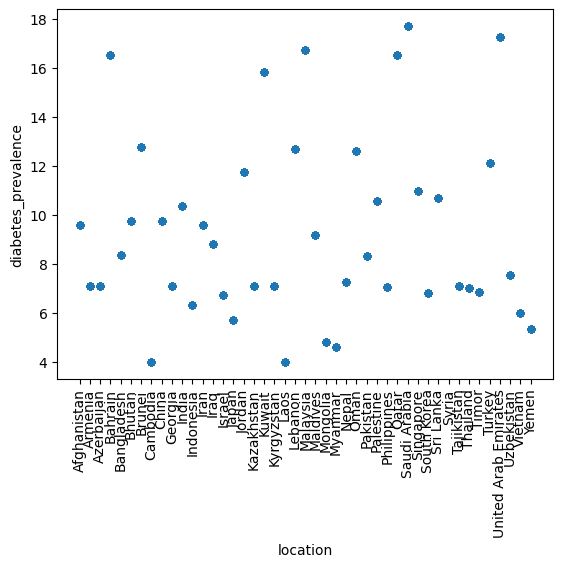

In [397]:
df[df['continent'] == 'Asia'].plot(kind='scatter', x='location', y='diabetes_prevalence')
plt.xticks(rotation=90)
plt.show()

In [398]:
df.groupby('location')['diabetes_prevalence'].agg([min, max])

,min,max
location,,
Afghanistan,9.59,9.59
Albania,10.08,10.08
Algeria,6.73,6.73
Andorra,7.97,7.97
Angola,3.94,3.94
...,...,...
Venezuela,6.47,6.47
Vietnam,6.00,6.00
Yemen,5.35,5.35


In [399]:
dic = df.groupby('continent')['diabetes_prevalence'].mean().to_dict()
for key, value in dic.items():
    dic[key] = round(value, 2)
dic

{'Africa': 5.63,
 'Asia': 9.38,
 'Europe': 6.55,
 'North America': 10.87,
 'Oceania': 17.18,
 'South America': 7.81}

In [400]:
impute(df, dic, 'diabetes_prevalence')
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
4,population_density,3609,8.023031
6,total_deaths,3051,6.782562
7,total_deaths_per_million,3051,6.782562
5,life_expectancy,884,1.965187
9,new_cases_smoothed_per_million,119,0.264544
10,new_cases_smoothed,119,0.264544
11,new_deaths_smoothed,98,0.217860
12,new_deaths_smoothed_per_million,98,0.217860
13,new_cases_per_million,68,0.151168
14,new_cases,68,0.151168


### Impute the rest of the variables by the mean of those variables in each 'continent'

In [401]:
impute_with_mean = ['population_density', 'total_deaths', 'total_deaths_per_million','life_expectancy','new_cases_smoothed_per_million',
                    'new_cases_smoothed']
for vble in impute_with_mean:
    dic = df.groupby('continent')[vble].mean().to_dict()
    for key, value in dic.items():
        dic[key] = round(value, 2)
    impute(df, dic, vble)
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
11,new_deaths_smoothed,98,0.217860
12,new_deaths_smoothed_per_million,98,0.217860
14,new_cases,68,0.151168
13,new_cases_per_million,68,0.151168
16,new_deaths,47,0.104484
15,new_deaths_per_million,47,0.104484
1,aged_70_older,0,0.000000
20,population,0,0.000000
19,total_cases_per_million,0,0.000000
18,date,0,0.000000


### Deleting missing values of 'new_deaths_smoothed' and 'new_cases'

In [402]:
df.dropna(subset=['new_deaths_smoothed'], inplace=True)

In [403]:
df.dropna(subset=['new_cases'], inplace=True)
missing_values = miss_values()
missing_values

,Feature,Empty Cells,Percentage %
0,cardiovasc_death_rate,0,0.0
1,aged_70_older,0,0.0
20,population,0,0.0
19,total_cases_per_million,0,0.0
18,date,0,0.0
17,total_cases,0,0.0
16,new_deaths,0,0.0
15,new_deaths_per_million,0,0.0
14,new_cases,0,0.0
13,new_cases_per_million,0,0.0


In [404]:
df.shape

(44855, 22)

In [405]:
print('Amount of data lost due to elimination of nulls:', amount_rows_before_manipulating_nulls-df.shape[0])
print('Percentage of lost data: {:.2f} %'.format(100-(df.shape[0]*100)/amount_rows_before_manipulating_nulls))

Amount of data lost due to elimination of nulls: 2920
Percentage of lost data: 6.11 %


### Which countries are in the df?

In [406]:
df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [418]:
df['location'].nunique() #Number of countries in the df

230

In [408]:
df['continent'].value_counts()

Africa           11259
Europe           10345
Asia              9027
North America     8184
Oceania           3222
South America     2818
Name: continent, dtype: int64

### Which is the country with the highest life_expectancy

In [409]:
df.groupby('location')['life_expectancy'].mean().sort_values(ascending=False).head(1)

location
Monaco    86.75
Name: life_expectancy, dtype: float64

### Exploring with Plotly Express

https://plotly.com/python/plotly-express/

In [410]:
import plotly.express as px

In [411]:
df.head()

,cardiovasc_death_rate,aged_70_older,median_age,diabetes_prevalence,population_density,life_expectancy,total_deaths,total_deaths_per_million,continent,new_cases_smoothed_per_million,new_cases_smoothed,new_deaths_smoothed,new_deaths_smoothed_per_million,new_cases_per_million,new_cases,new_deaths_per_million,new_deaths,total_cases,date,total_cases_per_million,population,location
iso_code,,,,,,,,,,,,,,,,,,,,,,
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.003,0.143,0.000,0.000,0.024,1.0,0.000,0.0,1.0,2020-03-01,0.024,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.003,0.143,0.000,0.000,0.000,0.0,0.000,0.0,1.0,2020-03-08,0.024,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.024,1.000,0.000,0.000,0.146,6.0,0.000,0.0,7.0,2020-03-15,0.170,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.083,3.429,0.000,0.000,0.413,17.0,0.000,0.0,24.0,2020-03-22,0.584,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,2.00,0.049,Asia,0.316,13.000,0.286,0.007,1.629,67.0,0.049,2.0,91.0,2020-03-29,2.213,41128772.0,Afghanistan


In [412]:
fig = px.scatter(df, x="diabetes_prevalence", y="life_expectancy", color="continent")
fig.show()

### Insights generation

#### Quantification of the problem: What is the total_cases by continent?

In [432]:
df_cont_target = df.groupby('continent')['total_cases'].sum().sort_values(ascending=False).reset_index()

<Axes: xlabel='continent', ylabel='total_cases'>

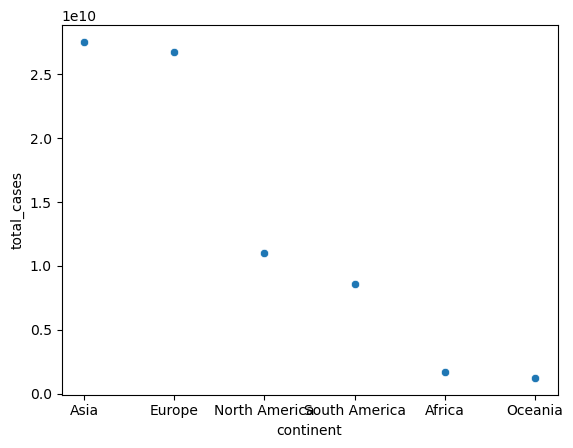

In [433]:
sns.scatterplot(x='continent', y='total_cases', data=df_cont_target)

In [431]:
df.head()

,cardiovasc_death_rate,aged_70_older,median_age,diabetes_prevalence,population_density,life_expectancy,total_deaths,total_deaths_per_million,continent,new_cases_smoothed_per_million,new_cases_smoothed,new_deaths_smoothed,new_deaths_smoothed_per_million,new_cases_per_million,new_cases,new_deaths_per_million,new_deaths,total_cases,date,total_cases_per_million,population,location
iso_code,,,,,,,,,,,,,,,,,,,,,,
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.003,0.143,0.000,0.000,0.024,1.0,0.000,0.0,1.0,2020-03-01,0.024,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.003,0.143,0.000,0.000,0.000,0.0,0.000,0.0,1.0,2020-03-08,0.024,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.024,1.000,0.000,0.000,0.146,6.0,0.000,0.0,7.0,2020-03-15,0.170,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,24367.85,487.430,Asia,0.083,3.429,0.000,0.000,0.413,17.0,0.000,0.0,24.0,2020-03-22,0.584,41128772.0,Afghanistan
AFG,597.029,1.337,18.6,9.59,54.422,64.83,2.00,0.049,Asia,0.316,13.000,0.286,0.007,1.629,67.0,0.049,2.0,91.0,2020-03-29,2.213,41128772.0,Afghanistan


#### What is the total_death_per_million by continent?

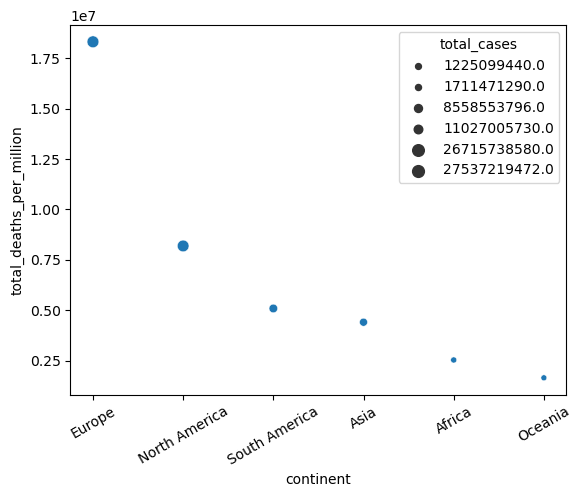

In [441]:
df_total_death_million_target = df.groupby('continent')['total_deaths_per_million'].sum().sort_values(ascending=False).reset_index()
sns.scatterplot(x='continent', y='total_deaths_per_million', data=df_total_death_million_target, size=df_cont_target['total_cases'])
plt.xticks(rotation=30)
plt.show()

With a majority of cases, there are a majority of deaths for each continent.

#### How new_cases are increasing for each country by continent

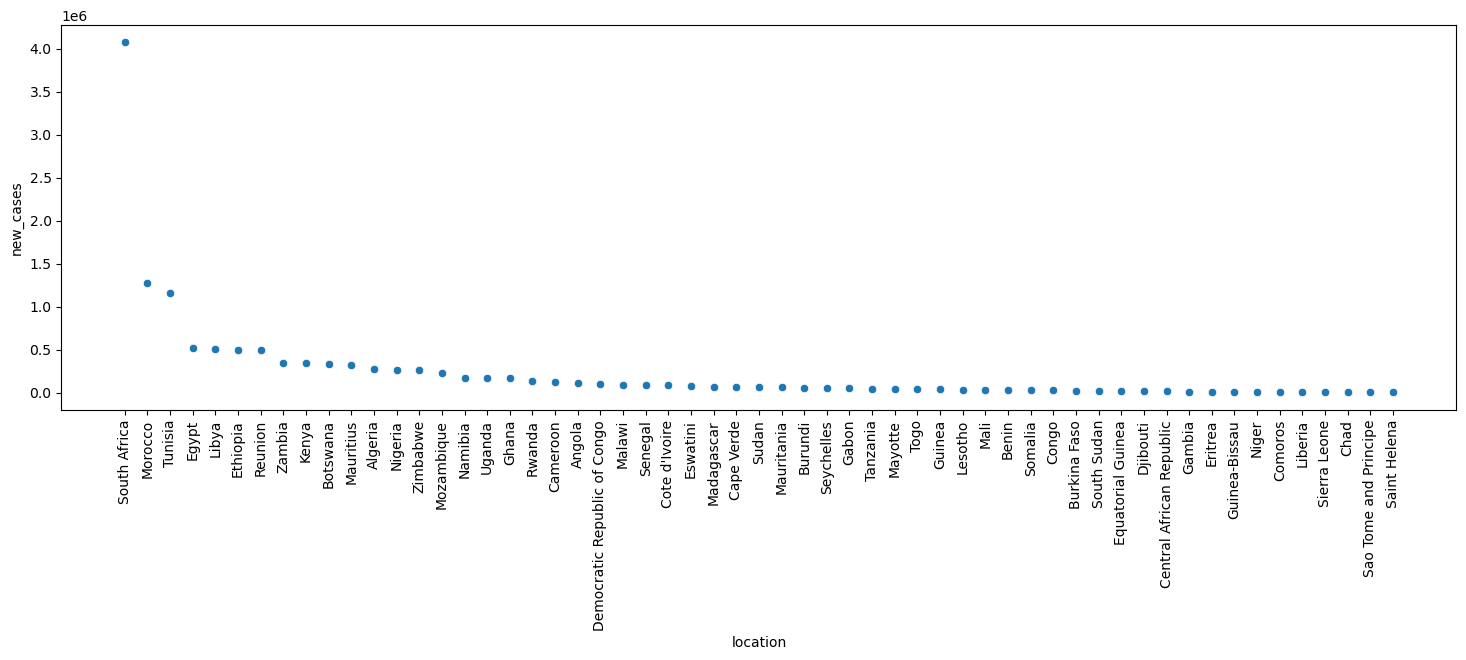

In [455]:
df_africa = df[df['continent'] == 'Africa'][['location', 'new_cases']]
group_africa_new_cases = df_africa.groupby('location')['new_cases'].sum().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize=(18,5))
sns.scatterplot(x='location', y='new_cases', data=group_africa_new_cases)
plt.xticks(rotation=90)
plt.show()

In [456]:
features_convenient = ['location', 'new_cases','population_density', 'life_expectancy', 'total_deaths', 
                                             'diabetes_prevalence', 'cardiovasc_death_rate', 'total_cases', 'date']
df_africa = df[df['continent'] == 'Africa'][features_convenient]
df_asia = df[df['continent'] == 'Asia'][features_convenient]
df_oceania = df[df['continent'] == 'Oceania'][features_convenient]
df_north_america = df[df['continent'] == 'North America'][features_convenient]
df_europe = df[df['continent'] == 'Europe'][features_convenient]
df_south_america = df[df['continent'] == 'South America'][features_convenient]

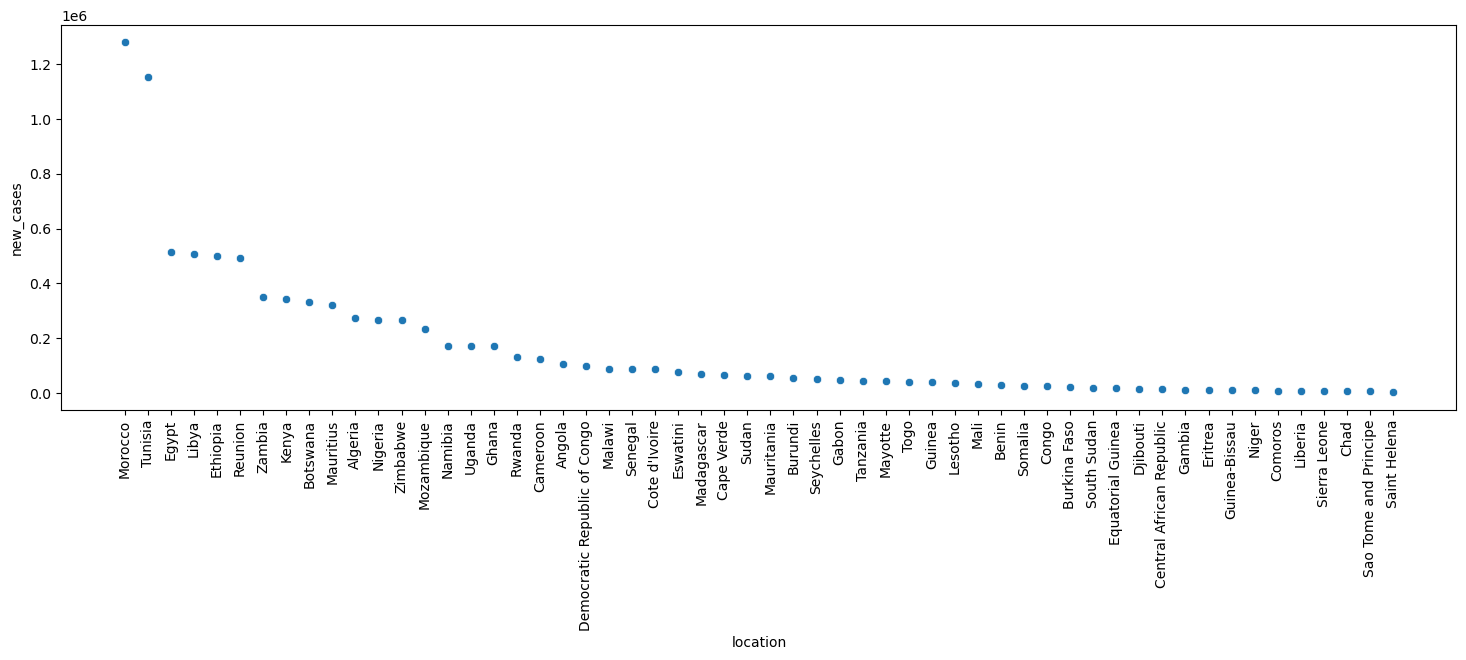

In [462]:
group_africa_new_cases = df_africa.groupby('location')['new_cases'].sum().sort_values(ascending=False).reset_index()
group_africa_new_cases.drop(0, inplace=True)
fig = plt.figure(figsize=(18,5))
sns.scatterplot(x='location', y='new_cases', data=group_africa_new_cases)
plt.xticks(rotation=90)
plt.show()

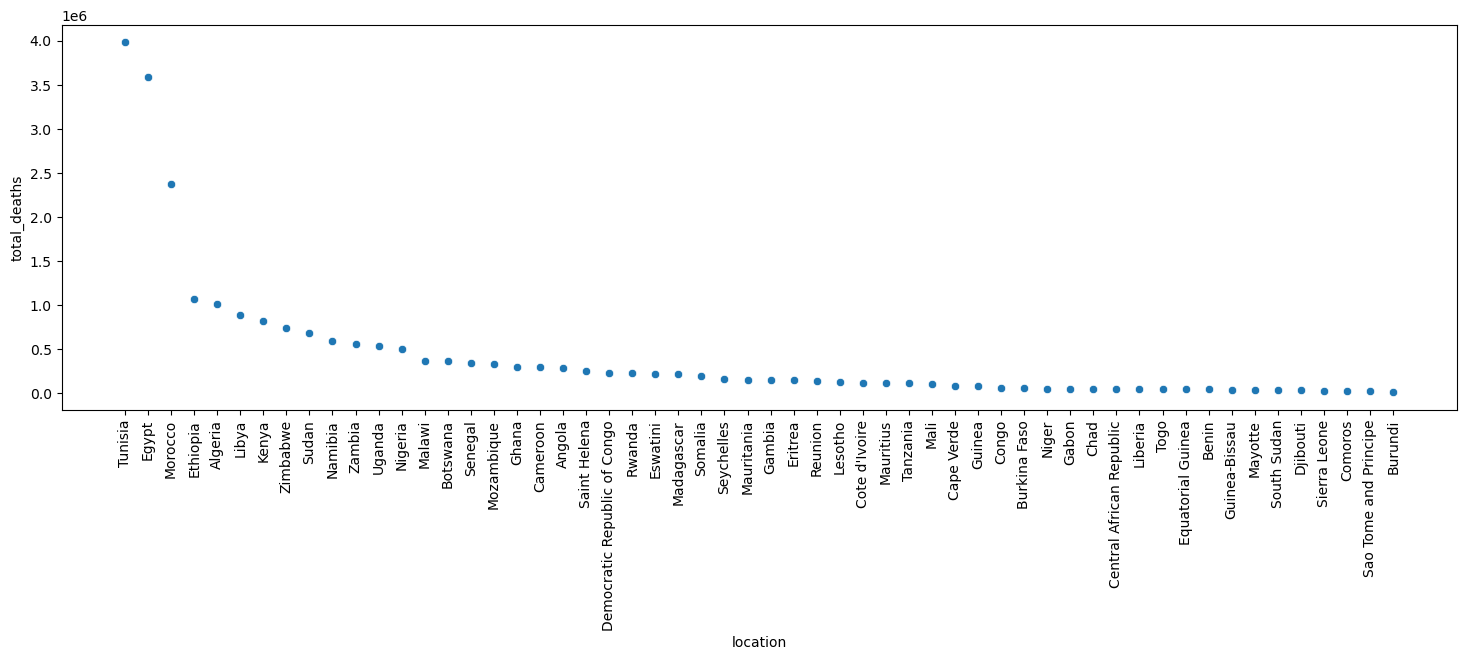

In [463]:
group_africa_total_deaths = df_africa.groupby('location')['total_deaths'].sum().sort_values(ascending=False).reset_index()
group_africa_total_deaths.drop(0, inplace=True)
fig = plt.figure(figsize=(18,5))
sns.scatterplot(x='location', y='total_deaths', data=group_africa_total_deaths)
plt.xticks(rotation=90)
plt.show()

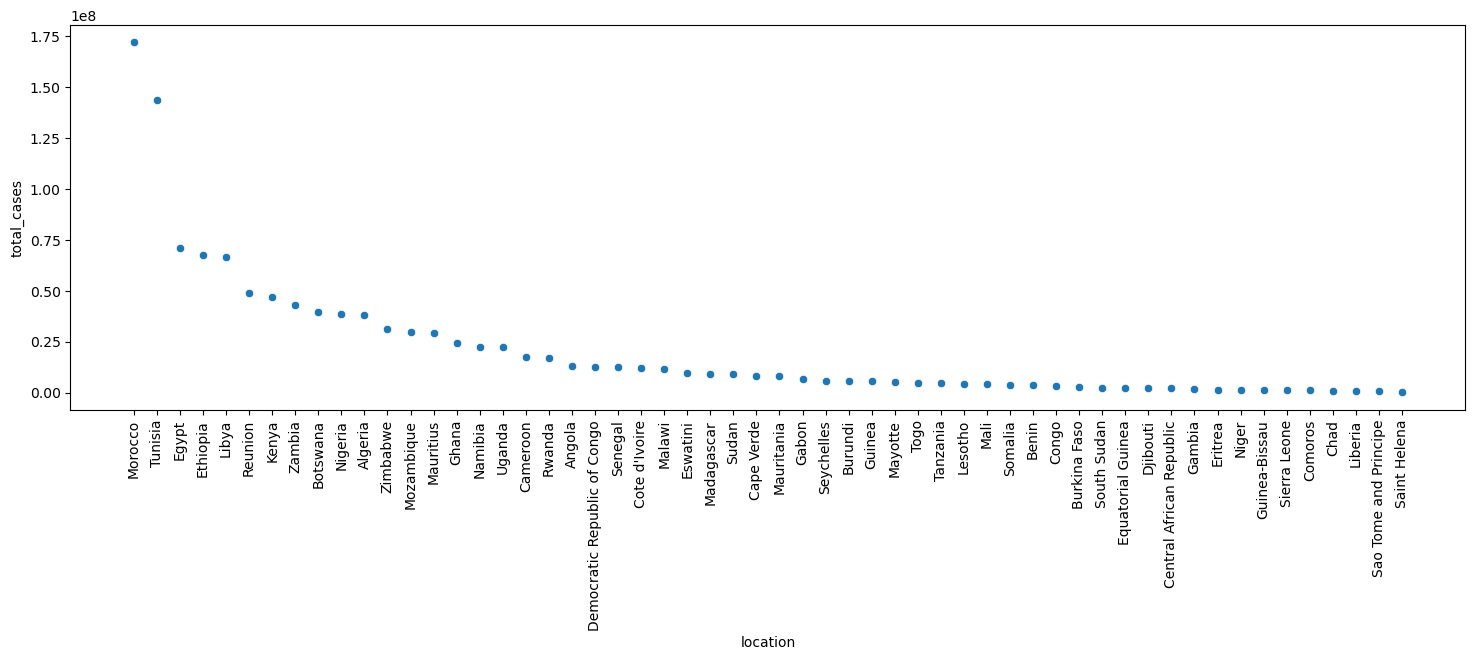

In [465]:
group_africa_total_cases = df_africa.groupby('location')['total_cases'].sum().sort_values(ascending=False).reset_index()
group_africa_total_cases.drop(0, inplace=True)
fig = plt.figure(figsize=(18,5))
sns.scatterplot(x='location', y='total_cases', data=group_africa_total_cases)
plt.xticks(rotation=90)
plt.show()

In [469]:
print(df.date.min())
print(df.date.max())
print(df.date.max() - df.date.min())

2020-02-09 00:00:00
2024-01-14 00:00:00
1435 days 00:00:00


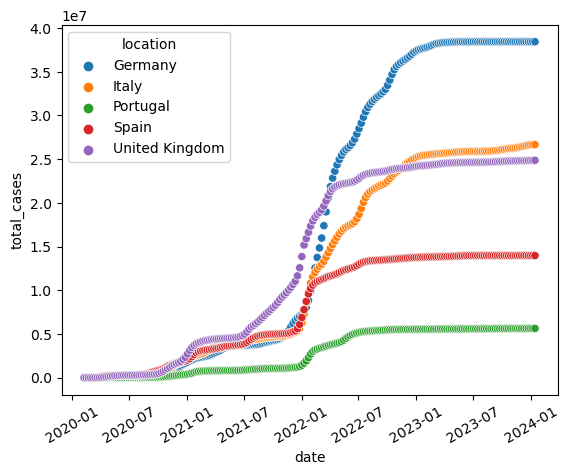

In [488]:
countries_to_view = ['Germany', 'Italy', 'Portugal', 'Spain', 'United Kingdom']

sns.scatterplot(x='date', y='total_cases', hue='location', data=df_europe[df_europe['location'].isin(countries_to_view)])
plt.xticks(rotation=30)

plt.show()